In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools 

In [2]:
%matplotlib inline

In [3]:
roiDict = {'OFC' : ['parsorbitalis', 'medialorbitofrontal', 'lateralorbitofrontal'], 
           'MPFC' : ['caudalanteriorcingulate', 'rostralanteriorcingulate', 'superiorfrontal'],
           'LPFC' : [ 'parstriangularis', 'rostralmiddlefrontal', 'frontalpole', 'parsopercularis'],
           'SMC' : [ 'precentral', 'caudalmiddlefrontal', 'postcentral', 'paracentral'],
           'PC' : ['inferiorparietal', 'supramarginal', 'precuneus', 'posteriorcingulate', 'isthmuscingulate', 'superiorparietal'],
           'MTC' : ['entorhinal', 'parahippocampal', 'fusiform'],
           'LTC' : ['transversetemporal', 'superiortemporal', 'bankssts', 'inferiortemporal', 'middletemporal', 'temporalpole'],
           'OCC' : ['pericalcarine', 'lingual', 'lateraloccipital', 'cuneus']}

In [4]:
roiOrder = ['LPFC', 'OFC', 'MPFC', 'LTC', 'MTC', 'SMC', 'PC', 'OCC']

In [5]:
all_thickness_data = pd.read_csv('all_cortical_dfs_2017_07_04.csv')

In [6]:
all_thickness_data

,Unnamed: 0,side,roi,region,thickness,thicknessstd,volume,subject,folderName,age,sex
0,0,lh,bankssts,LTC,2.577,0.439,2997.0,NOR01_LSJ,NOR01_LSJ,26,M
1,1,lh,caudalanteriorcingulate,MPFC,3.062,0.523,1503.0,NOR01_LSJ,NOR01_LSJ,26,M
2,2,lh,caudalmiddlefrontal,SMC,2.653,0.577,6245.0,NOR01_LSJ,NOR01_LSJ,26,M
3,3,lh,cuneus,OCC,1.837,0.532,3318.0,NOR01_LSJ,NOR01_LSJ,26,M
4,4,lh,entorhinal,MTC,3.189,0.985,1945.0,NOR01_LSJ,NOR01_LSJ,26,M
5,5,lh,frontalpole,LPFC,3.339,0.791,960.0,NOR01_LSJ,NOR01_LSJ,26,M
6,6,lh,fusiform,MTC,2.832,0.694,11666.0,NOR01_LSJ,NOR01_LSJ,26,M
7,7,lh,inferiorparietal,PC,2.415,0.611,14749.0,NOR01_LSJ,NOR01_LSJ,26,M
8,8,lh,inferiortemporal,LTC,2.951,0.781,12637.0,NOR01_LSJ,NOR01_LSJ,26,M
9,9,lh,isthmuscingulate,PC,2.532,0.983,3101.0,NOR01_LSJ,NOR01_LSJ,26,M


In [7]:
range_of_age = np.arange(all_thickness_data['age'].min(), all_thickness_data['age'].max() + 1)

In [8]:
range_of_age

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [9]:
age_group_1,age_group_2,age_group_3,age_group_4 = np.array_split(range_of_age, 4)

In [10]:
groups = [age_group_1, age_group_2, age_group_3, age_group_4]

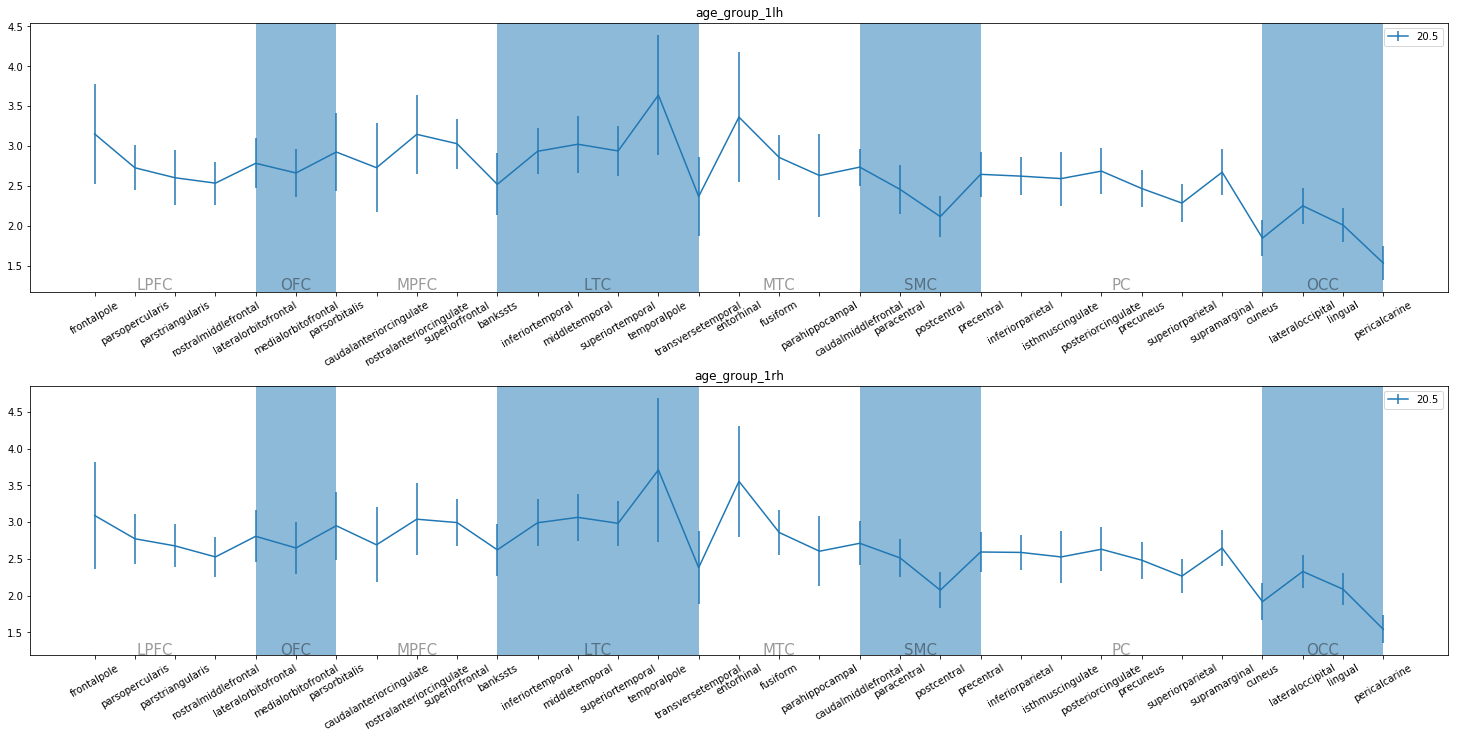

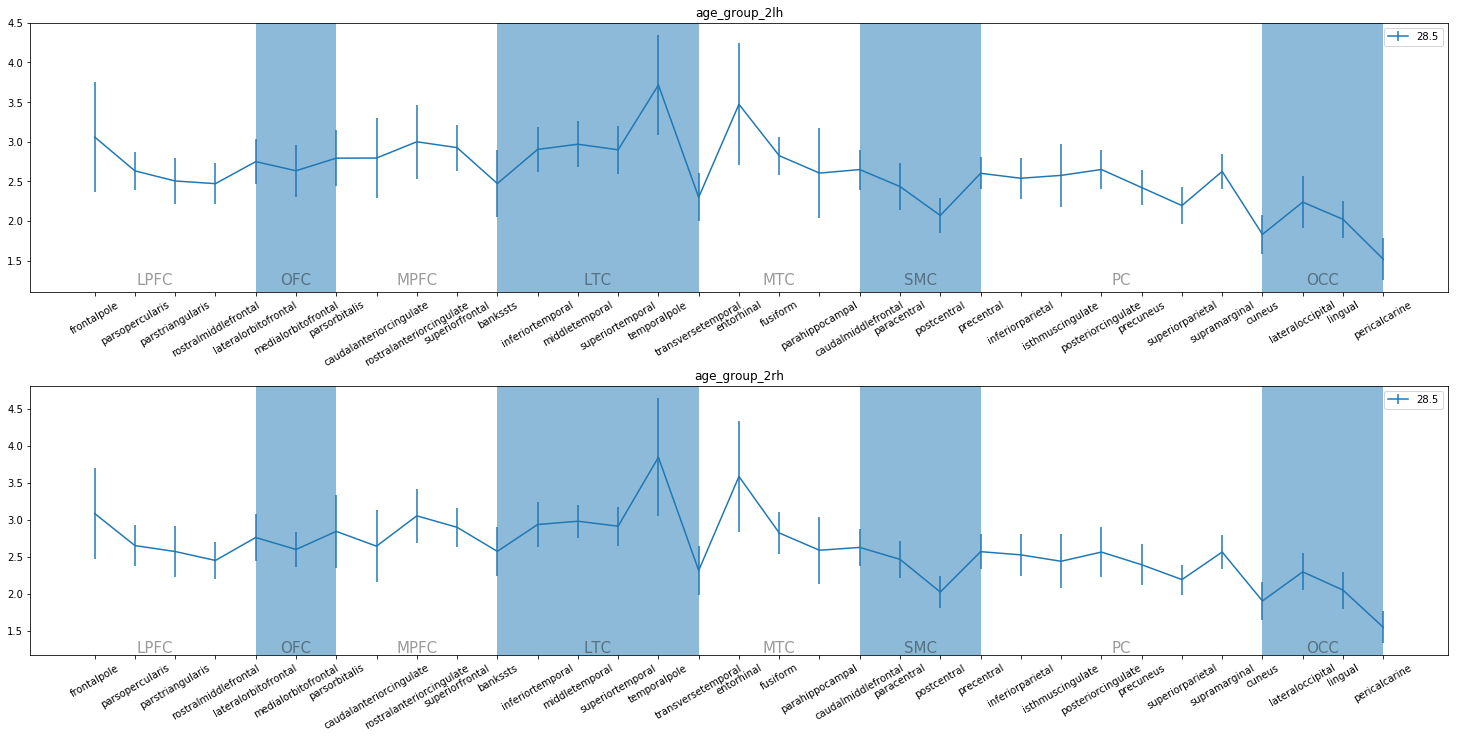

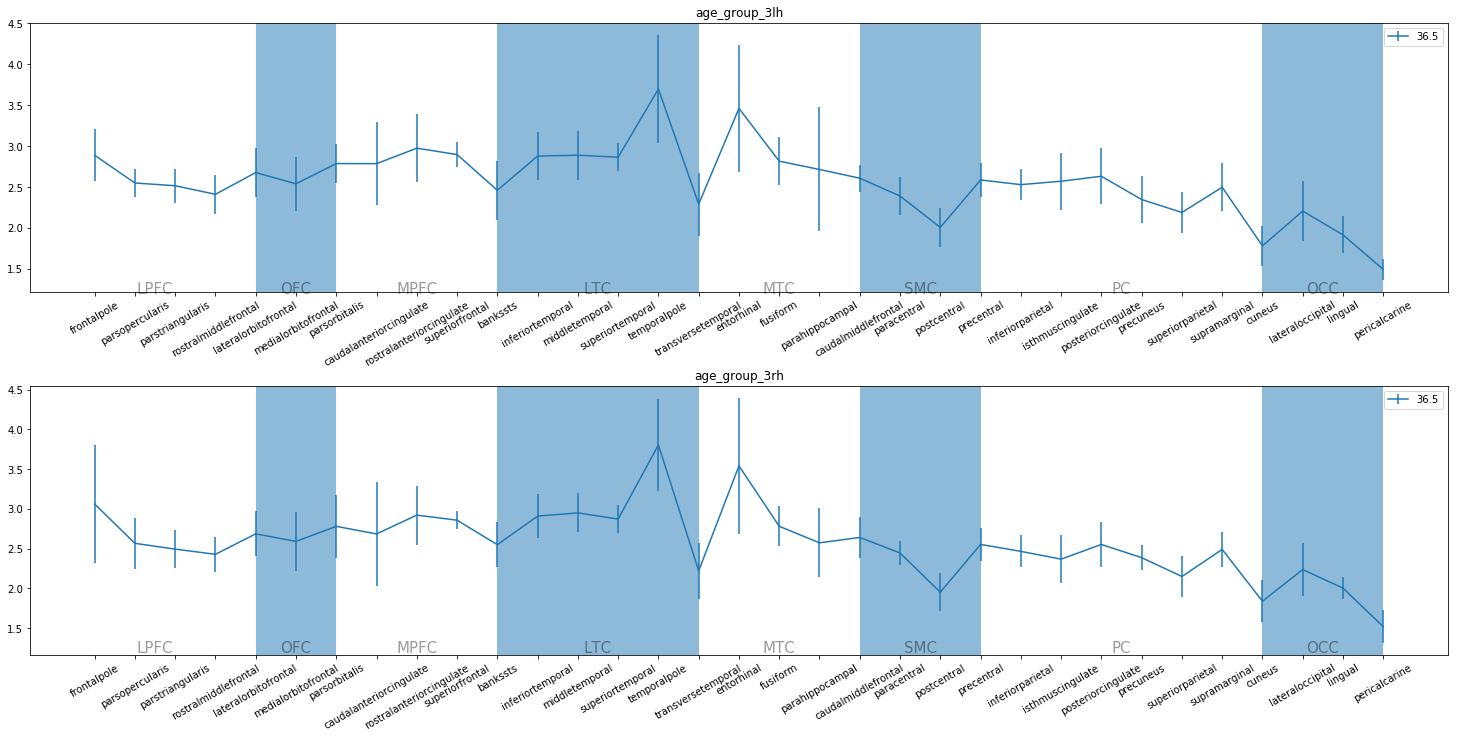

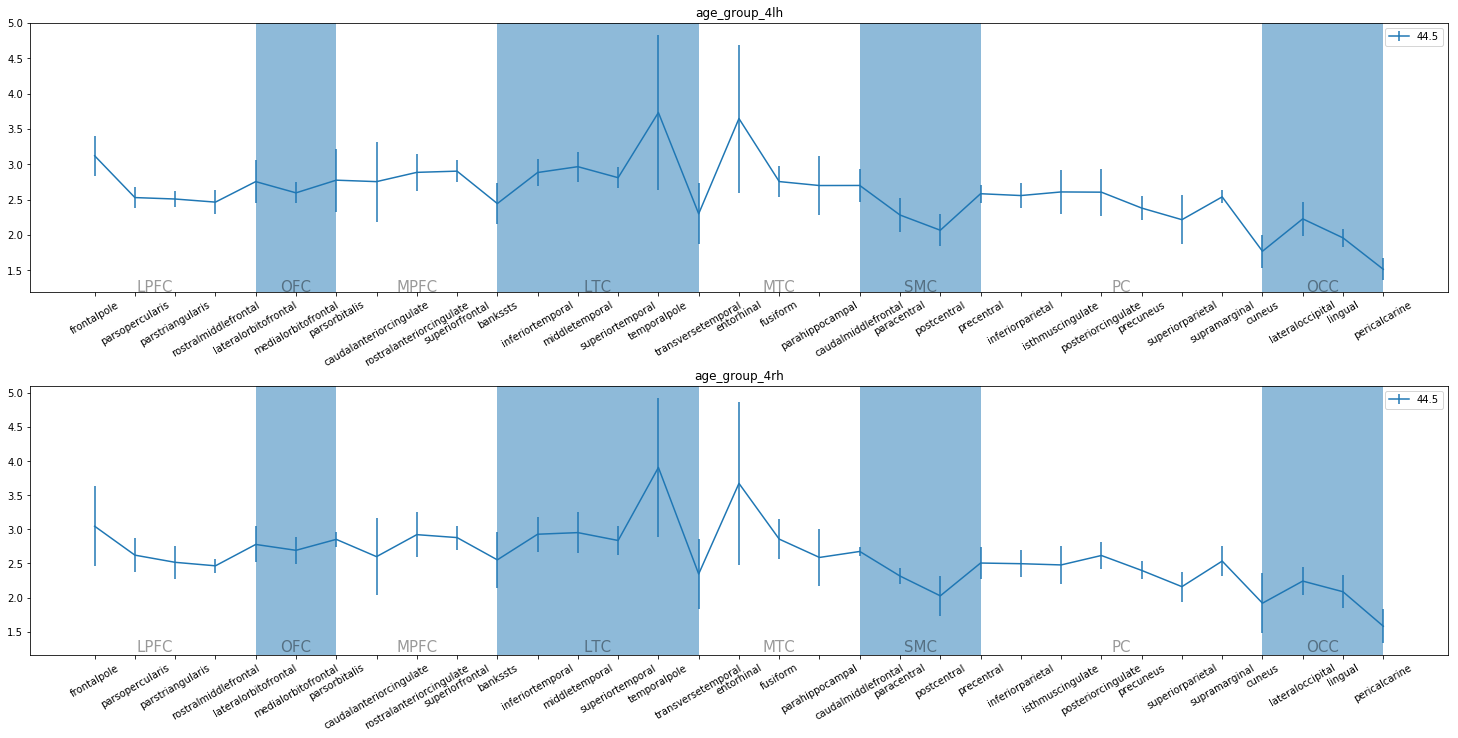

In [11]:
for i, assigned_group in enumerate(groups):
    
    age_group_name = 'age_group_' + str(i + 1)
    
    
    age_assigned = str(assigned_group.mean())
    
    age_group_thickness = all_thickness_data[all_thickness_data['age'].isin(assigned_group)]
    age_group_thickness = age_group_thickness[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject']]
    age_group_thickness_mean = age_group_thickness.groupby(['roi','side','region']).mean().reset_index()
    age_group_thickness_std = age_group_thickness.groupby(['roi','side','region']).std().reset_index()
    age_group_thickness_std = age_group_thickness_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
    age_group_thickness_mean_std = pd.merge(age_group_thickness_mean, age_group_thickness_std, how='inner')
    
    fig, axes = plt.subplots(nrows=2, figsize=(22,12), facecolor='white')
    
    
    for snum, side in enumerate(['lh', 'rh']):
        
        reorder_df = age_group_thickness_mean_std.sort_values(['roi','side'])
        gb = reorder_df.groupby('region')
        reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
        reordered_df = reordered_df.reset_index()
        
        roiList = reordered_df.roi.unique()
        
        ax = axes[snum]
        y = reordered_df[reordered_df.side == side]
        ax.errorbar(range(len(roiList)), y.thickness, y.thickness_std*2, label=age_assigned)
        ax.set_title(age_group_name + side)
        
        
        ax.set_xticks(range(len(roiList)))
        ax.set_xticklabels(['' for x in roiList])
    
        roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
        roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
        roiOrder_array = np.array(roiOrder_one_list)
        regionToHighlight = roiOrder[1::2]
        xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
        for x in xCoords:
            ax.axvspan(x[0], x[-1], alpha=0.5)
        
        startNum = 0
        for region in roiOrder:
            x_starting_point = startNum
            startNum = startNum + len(roiDict[region])
            ax.text((x_starting_point-.5 + startNum-.5)/2, 1.2, region, horizontalalignment='center', alpha=.4, fontsize=15)
        
        ax.set_xticklabels(roiList)
        labels = ax.get_xticklabels()
        plt.setp(labels, rotation=30)
        plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    
    
        ax.legend()
    plt.show()

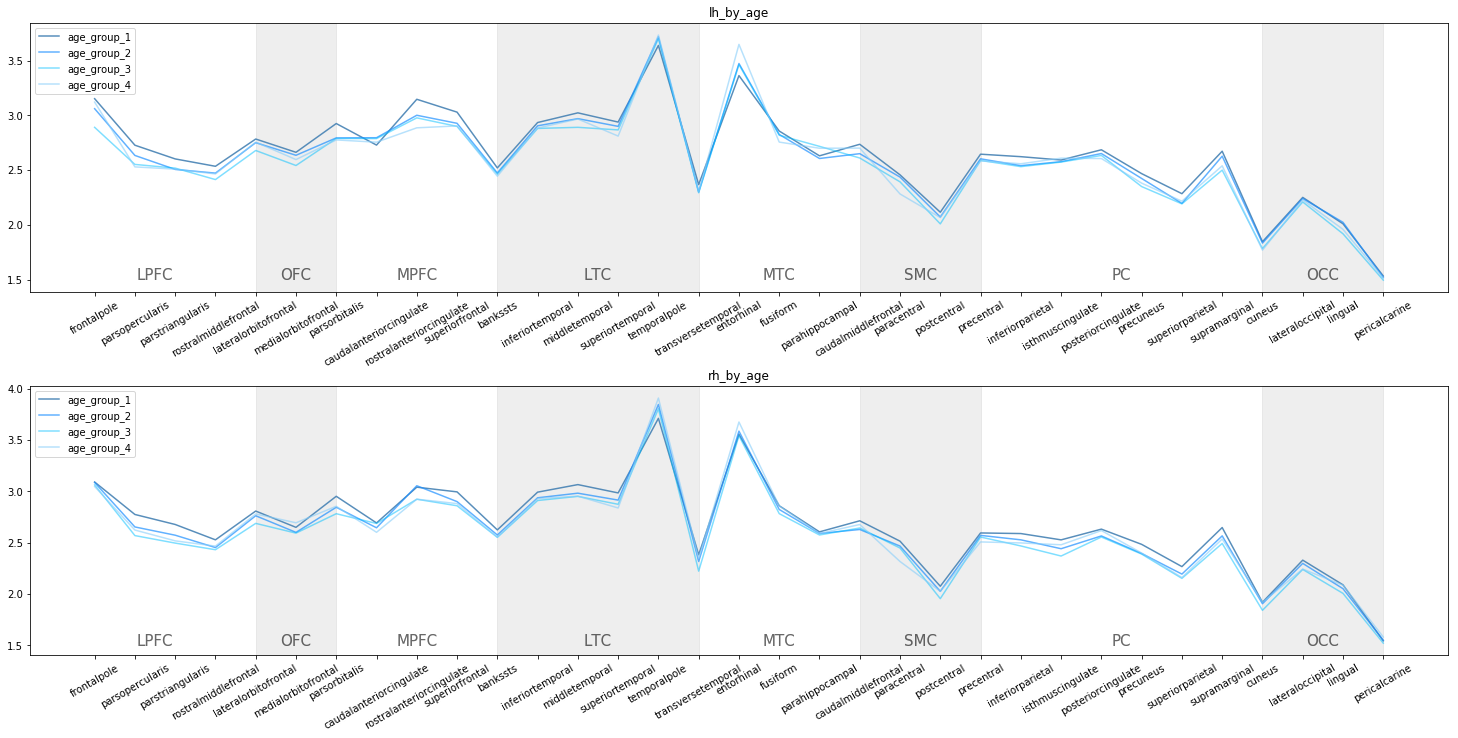

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(22,12), facecolor='white')

alphas = [0.9, 0.7, 0.5, 0.6]

#line_style = ['solid', 'dashdot', 'dashed', 'dotted']

color_list = ['steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue' ]


for i, (assigned_group, alpha, colored) in enumerate(zip(groups, alphas, color_list)):
    
    age_group_name = 'age_group_' + str(i + 1)
    
    
    age_assigned = str(assigned_group.mean())
    
    age_group_thickness = all_thickness_data[all_thickness_data['age'].isin(assigned_group)]
    age_group_thickness = age_group_thickness[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject']]
    age_group_thickness_mean = age_group_thickness.groupby(['roi','side','region']).mean().reset_index()
    age_group_thickness_std = age_group_thickness.groupby(['roi','side','region']).std().reset_index()
    age_group_thickness_std = age_group_thickness_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
    age_group_thickness_mean_std = pd.merge(age_group_thickness_mean, age_group_thickness_std, how='inner')
        
    for snum, side in enumerate(['lh', 'rh']):
        
        reorder_df = age_group_thickness_mean_std.sort_values(['roi','side'])
        gb = reorder_df.groupby('region')
        reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
        reordered_df = reordered_df.reset_index()
        
        roiList = reordered_df.roi.unique()
        
        
        y = reordered_df[reordered_df.side == side]
        axes[snum].plot(range(len(roiList)), y.thickness, label=age_group_name, alpha=alpha, color=colored)
        axes[snum].set_title(side+ '_by_age')
        
        
        
        axes[snum].set_xticks(range(len(roiList)))
        axes[snum].set_xticklabels(['' for x in roiList])
        
        roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
        roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
        roiOrder_array = np.array(roiOrder_one_list)
        regionToHighlight = roiOrder[1::2]
        xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
        for x in xCoords:
            axes[snum].axvspan(x[0], x[-1], alpha=0.1, color='lightgrey')
            
        
        startNum = 0
        for region in roiOrder:
            x_starting_point = startNum
            startNum = startNum + len(roiDict[region])
            axes[snum].text((x_starting_point-.5 + startNum-.5)/2, 1.5, region, horizontalalignment='center', alpha=.2, fontsize=15)
            
        
        axes[snum].set_xticklabels(roiList)
        labels = axes[snum].get_xticklabels()
        plt.setp(labels, rotation=30)
        plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    

        axes[snum].legend()
        
    
plt.show()
 
    

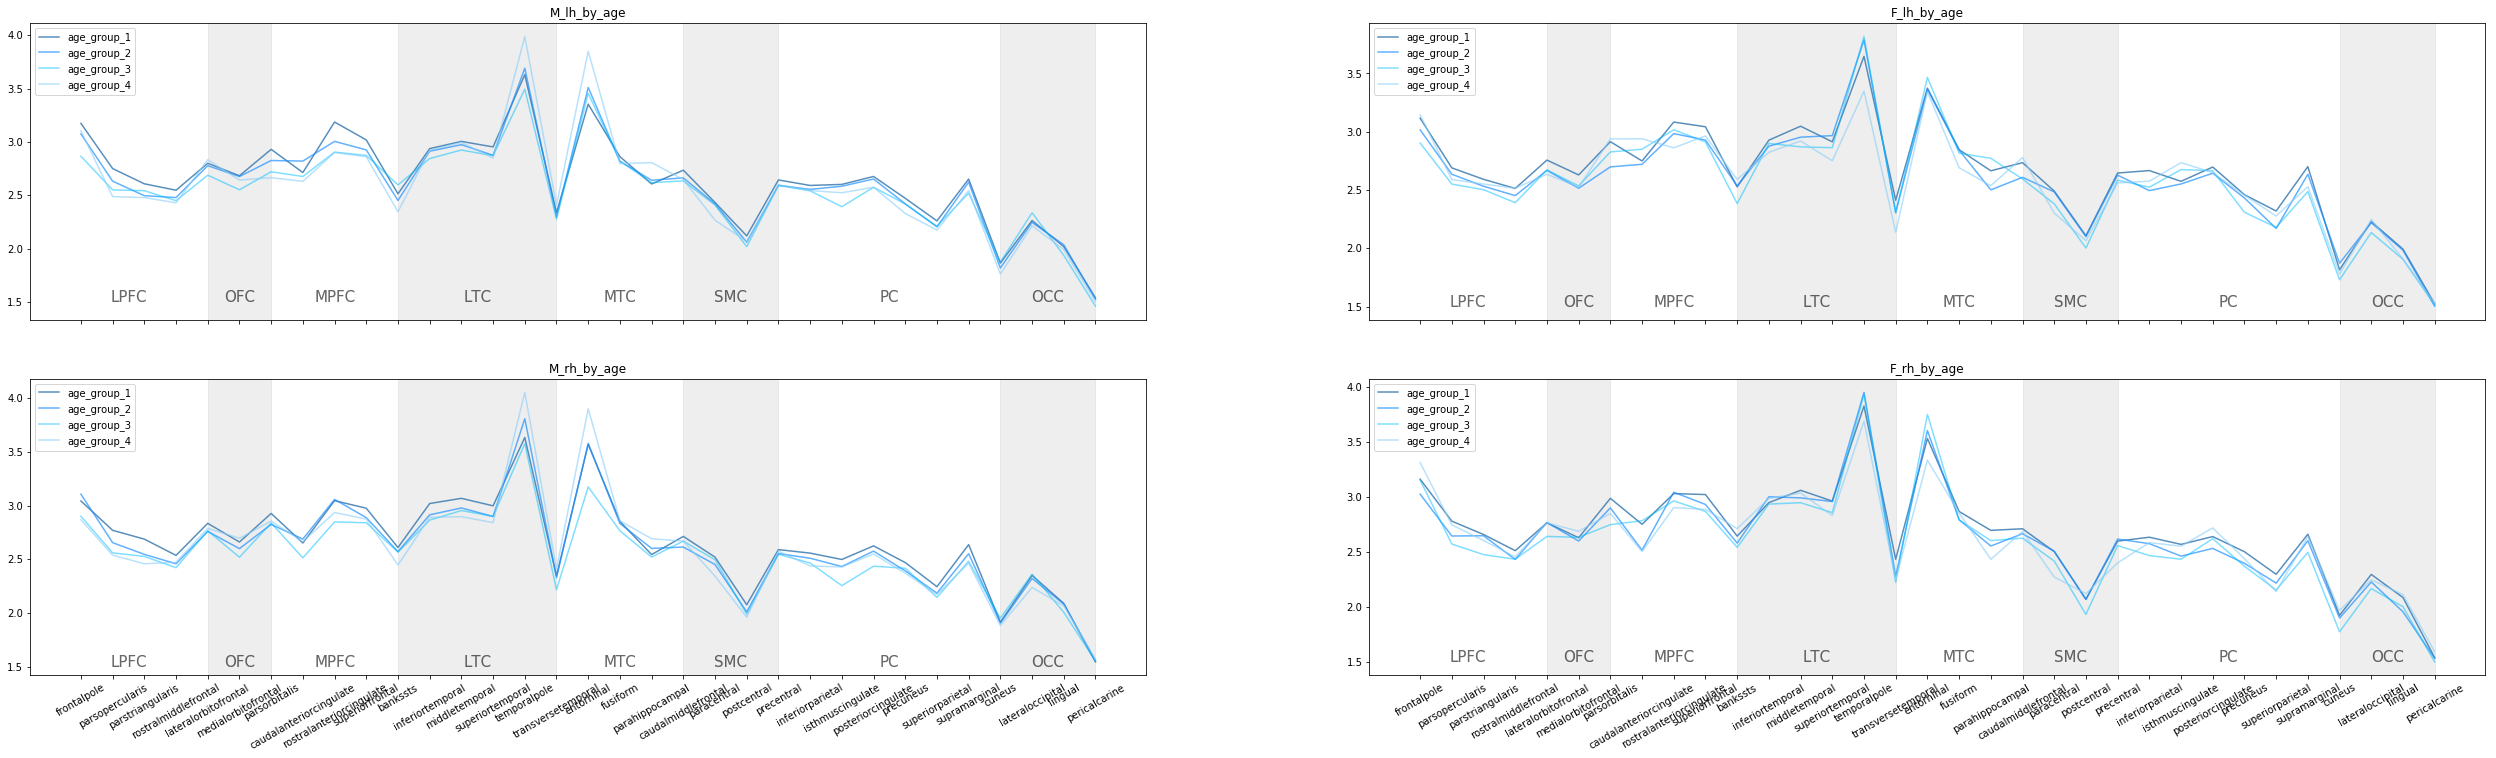

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(44,12), sharex=True, facecolor='white')

alphas = [0.9, 0.7, 0.5, 0.6]

color_list = ['steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue' ]

for i, (assigned_group, alpha, colored) in enumerate(zip(groups, alphas, color_list)):
    
    age_group_name = 'age_group_' + str(i + 1)
    
    age_assigned = str(assigned_group.mean())
    
    age_group_thickness = all_thickness_data[all_thickness_data['age'].isin(assigned_group)]
    age_group_thickness = age_group_thickness[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject', 'sex']]
    age_group_thickness_mean = age_group_thickness.groupby(['roi','side','region','sex']).mean().reset_index()
    age_group_thickness_std = age_group_thickness.groupby(['roi','side','region','sex']).std().reset_index()
    age_group_thickness_std = age_group_thickness_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
    age_group_thickness_mean_std = pd.merge(age_group_thickness_mean, age_group_thickness_std, how='inner')
        
    
    
    for snum, side in enumerate(['lh', 'rh']):
        
        for ssnum, sexes in enumerate(['M', 'F']):
            
            reorder_df = age_group_thickness_mean_std.sort_values(['roi','side','sex'])
            gb = reorder_df.groupby('region')
            reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
            reordered_df = reordered_df.reset_index()
        
            roiList = reordered_df.roi.unique()            
        
        
            y = reordered_df[reordered_df.side == side]
            y = y[y.sex == sexes]
            axes[snum,ssnum].plot(range(len(roiList)), y.thickness, label=age_group_name, alpha=alpha, color=colored)
            axes[snum,ssnum].set_title(sexes+ '_' + side+ '_by_age')
        
        
            axes[snum,ssnum].set_xticks(range(len(roiList)))
            axes[snum,ssnum].set_xticklabels(['' for x in roiList])
        
            roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
            roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
            roiOrder_array = np.array(roiOrder_one_list)
            regionToHighlight = roiOrder[1::2]
            xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
            for x in xCoords:
                axes[snum,ssnum].axvspan(x[0], x[-1], alpha=0.1, color='lightgrey')
            
        
            startNum = 0
            for region in roiOrder:
                x_starting_point = startNum
                startNum = startNum + len(roiDict[region])
                axes[snum,ssnum].text((x_starting_point-.5 + startNum-.5)/2, 1.5, region, horizontalalignment='center', alpha=.2, fontsize=15)
            
        
            axes[snum,ssnum].set_xticklabels(roiList)
            labels = axes[snum,ssnum].get_xticklabels()
            plt.setp(labels, rotation=30)
           # plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    

            axes[snum,ssnum].legend()
        
    
plt.show()
 

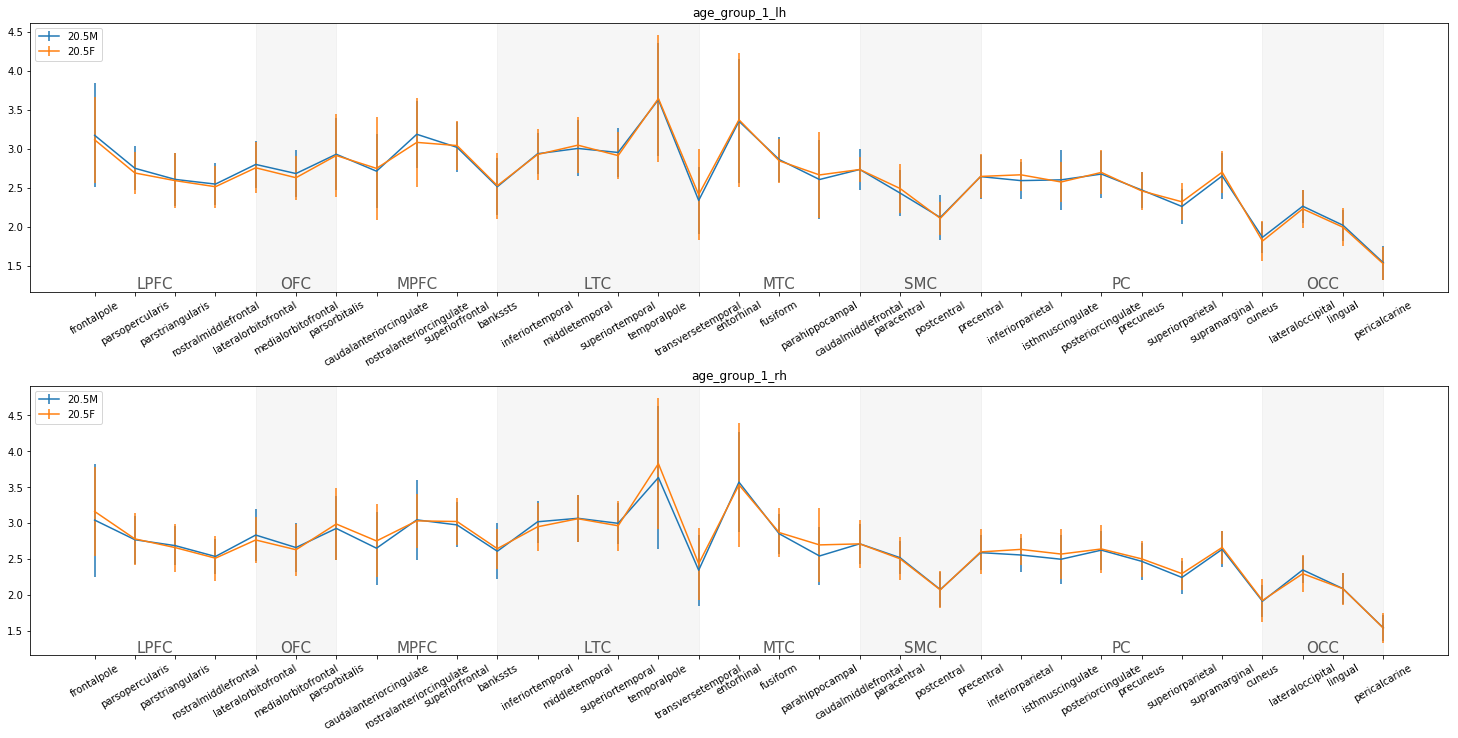

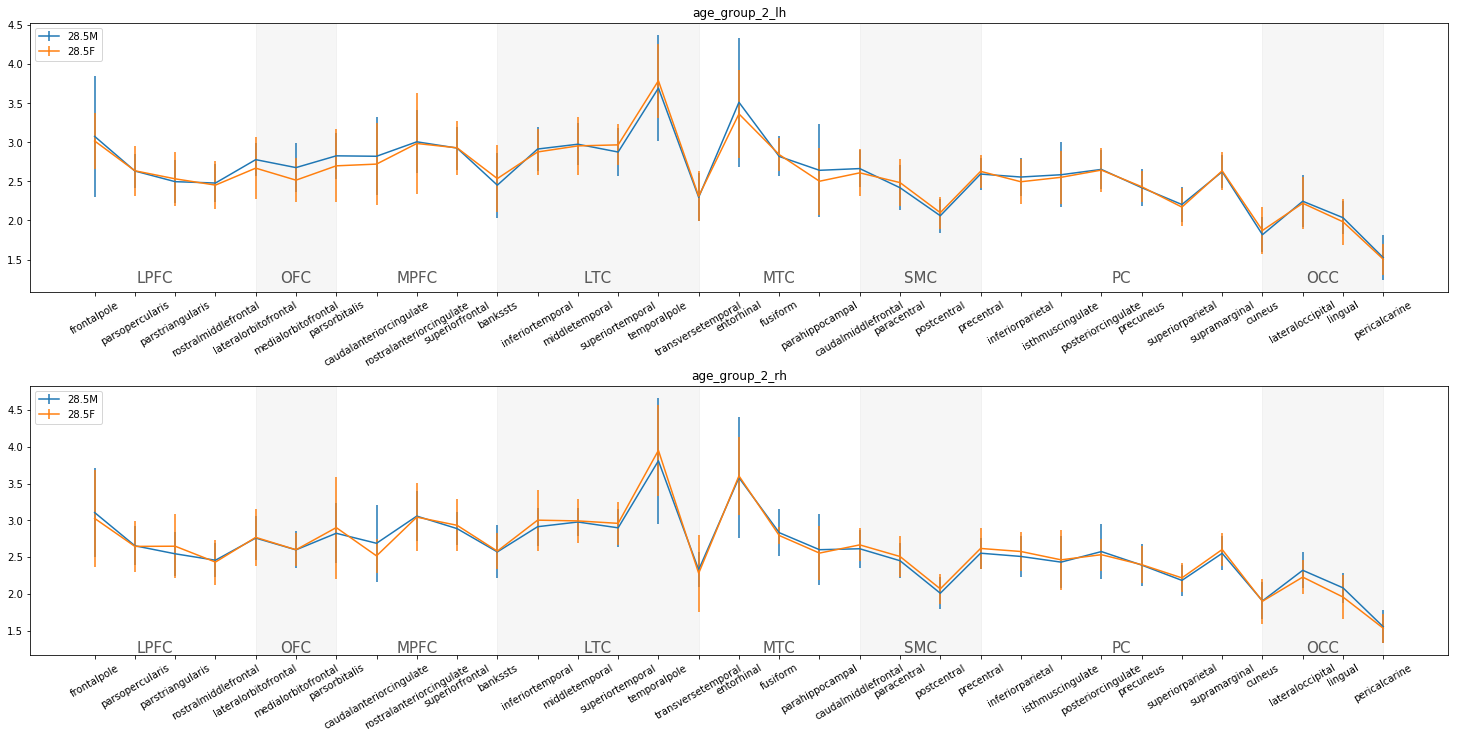

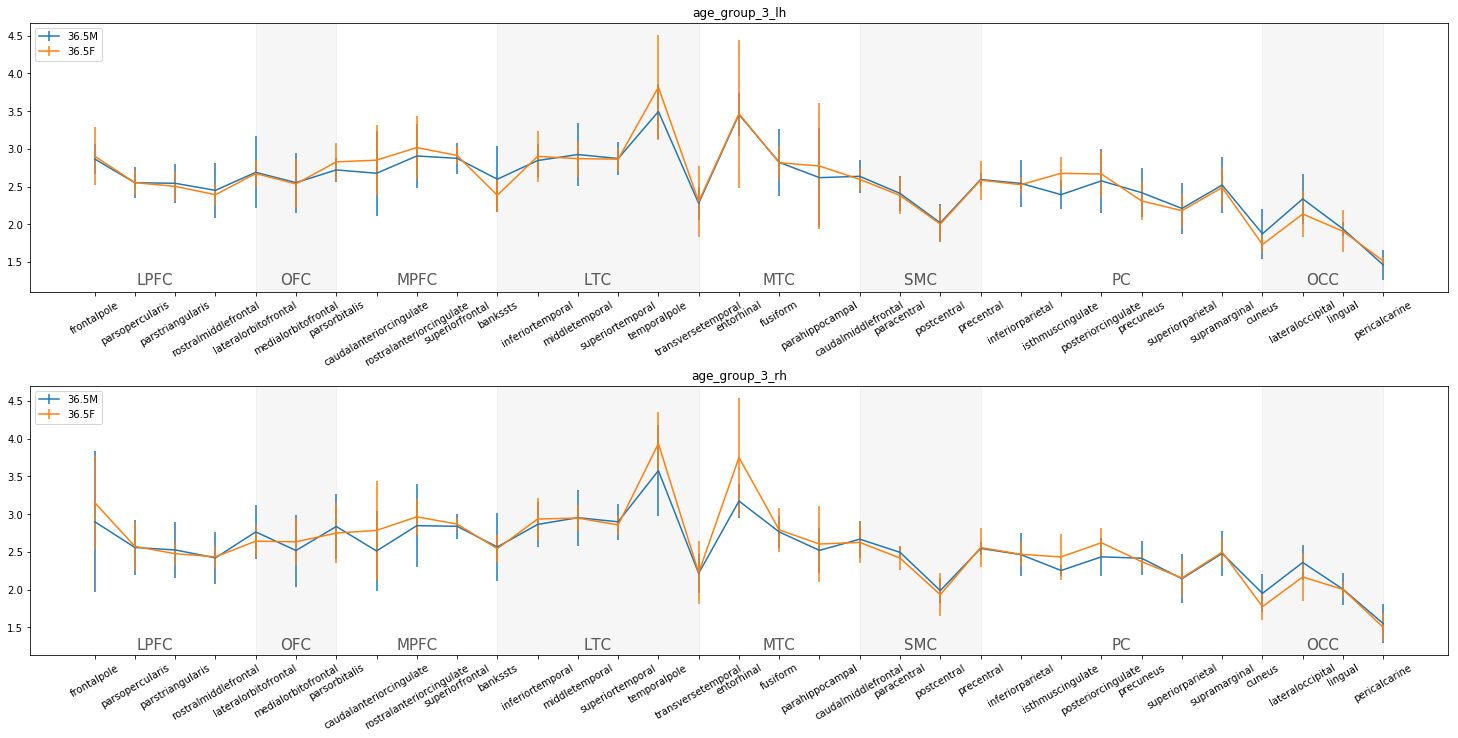

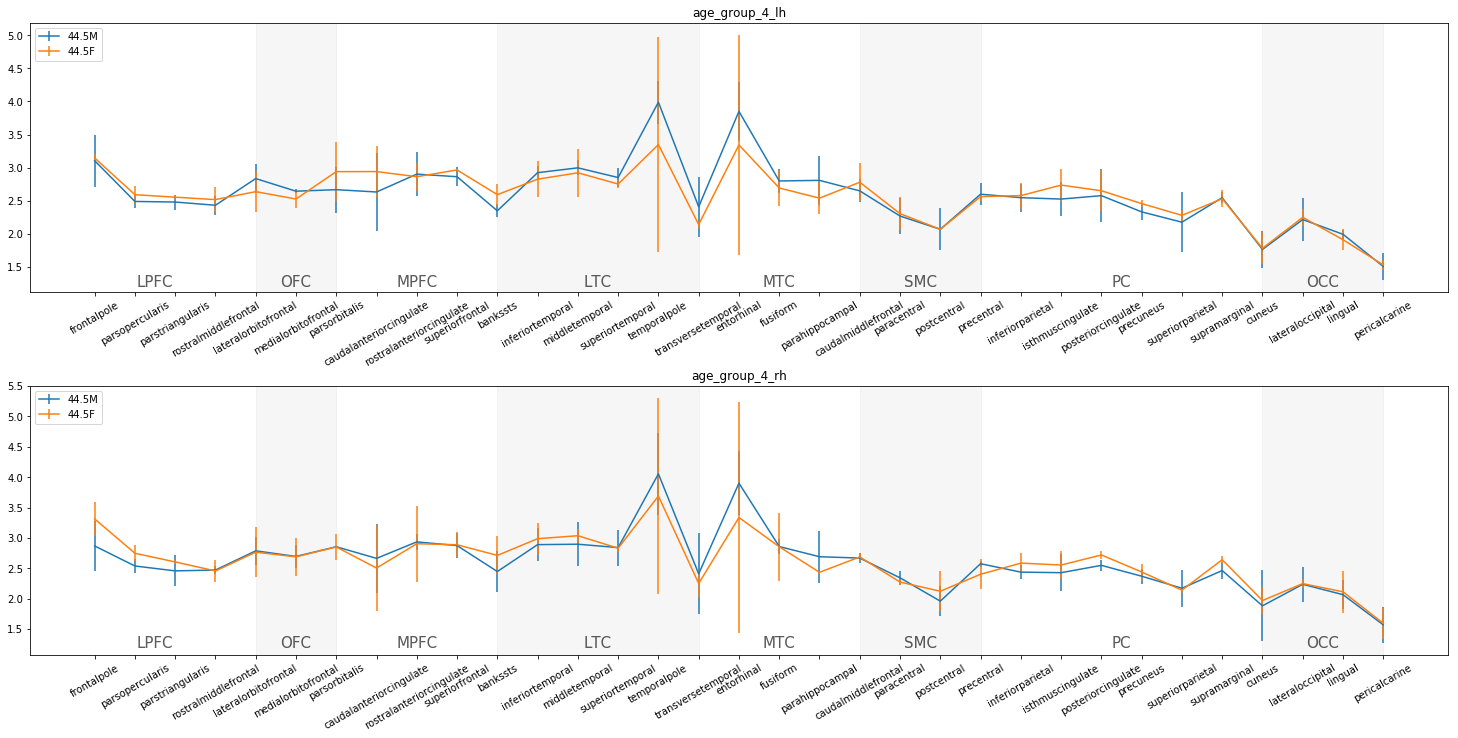

In [14]:
for i, assigned_group in enumerate(groups):
    
    age_group_name = 'age_group_' + str(i + 1)
      
    age_assigned = str(assigned_group.mean())
    
    age_group_thickness = all_thickness_data[all_thickness_data['age'].isin(assigned_group)]
    age_group_thickness = age_group_thickness[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject', 'sex']]
    age_group_thickness_mean = age_group_thickness.groupby(['roi','side','region','sex']).mean().reset_index()
    age_group_thickness_std = age_group_thickness.groupby(['roi','side','region','sex']).std().reset_index()
    age_group_thickness_std = age_group_thickness_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
    age_group_thickness_mean_std = pd.merge(age_group_thickness_mean, age_group_thickness_std, how='inner')
    
    fig, axes = plt.subplots(nrows=2, figsize=(22,12), facecolor='white')
    
    
    for snum, side in enumerate(['lh', 'rh']):
        
        reorder_df = age_group_thickness_mean_std.sort_values(['roi','side','sex'])
        gb = reorder_df.groupby('region')
        reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
        reordered_df = reordered_df.reset_index()
        
        roiList = reordered_df.roi.unique()
        
        
        for sexes in (['M', 'F']):
            ax = axes[snum]
            y = reordered_df[reordered_df.sex == sexes]
            y = y[y.side == side]
            ax.errorbar(range(len(roiList)), y.thickness, y.thickness_std*2, label=age_assigned + sexes)
            ax.set_title(age_group_name + '_' + side)
        
        
            ax.set_xticks(range(len(roiList)))
            ax.set_xticklabels(['' for x in roiList])
    
            roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
            roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
            roiOrder_array = np.array(roiOrder_one_list)
            regionToHighlight = roiOrder[1::2]
            xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
            for x in xCoords:
                ax.axvspan(x[0], x[-1], color='lightgray', alpha=0.1)
        
            startNum = 0
            for region in roiOrder:
                x_starting_point = startNum
                startNum = startNum + len(roiDict[region])
                ax.text((x_starting_point-.5 + startNum-.5)/2, 1.2, region, horizontalalignment='center', alpha=.4, fontsize=15)
        
            ax.set_xticklabels(roiList)
            labels = ax.get_xticklabels()
            plt.setp(labels, rotation=30)
            plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    
    
            ax.legend()
    plt.show()

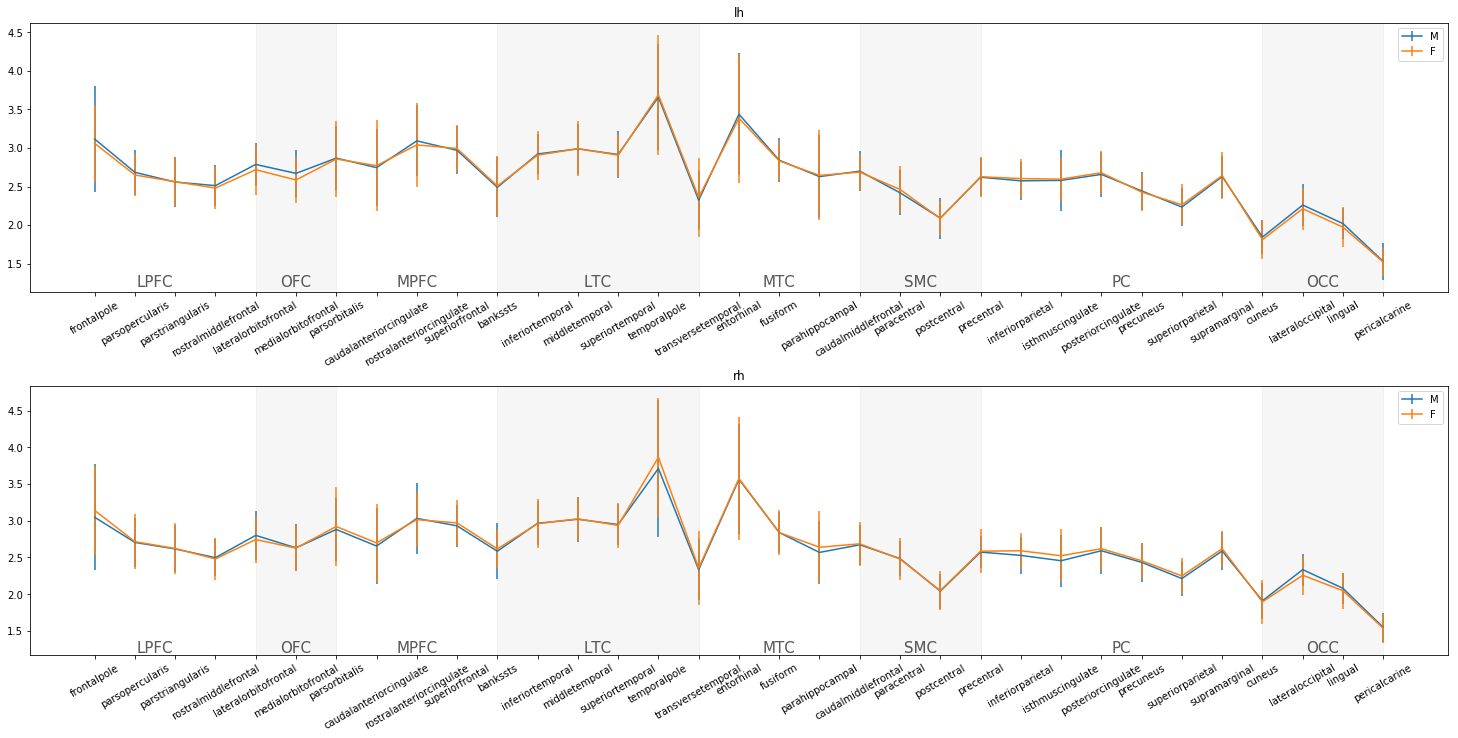

In [90]:
allAge_sex_group = all_thickness_data[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject', 'sex']]
allAge_sex_group_mean = allAge_sex_group.groupby(['roi','side','region','sex']).mean().reset_index()
allAge_sex_group_std = allAge_sex_group.groupby(['roi','side','region','sex']).std().reset_index()
allAge_sex_group_std = allAge_sex_group_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
allAge_sex_group_mean_std = pd.concat([allAge_sex_group_mean, allAge_sex_group_std], axis=1)
output = allAge_sex_group_mean_std.T.drop_duplicates().T

fig, axes = plt.subplots(nrows=2, figsize=(22,12), facecolor='white')



for snum, side in enumerate(['lh', 'rh']):
        
        reorder_df = output.sort_values(['roi','side','sex'])
        gb = reorder_df.groupby('region')
        reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
        reordered_df = reordered_df.reset_index()
        
        roiList = reordered_df.roi.unique()
        
        
        for sexes in (['M', 'F']):
            ax = axes[snum]
            y = reordered_df[reordered_df.sex == sexes]
            y = y[y.side == side]
            ax.errorbar(range(len(roiList)), y.thickness, y.thickness_std*2, label=sexes)
            ax.set_title(side)
        
        
            ax.set_xticks(range(len(roiList)))
            ax.set_xticklabels(['' for x in roiList])
    
            roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
            roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
            roiOrder_array = np.array(roiOrder_one_list)
            regionToHighlight = roiOrder[1::2]
            xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
            for x in xCoords:
                ax.axvspan(x[0], x[-1], color='lightgray', alpha=0.1)
        
            startNum = 0
            for region in roiOrder:
                x_starting_point = startNum
                startNum = startNum + len(roiDict[region])
                ax.text((x_starting_point-.5 + startNum-.5)/2, 1.2, region, horizontalalignment='center', alpha=.4, fontsize=15)
        
            ax.set_xticklabels(roiList)
            labels = ax.get_xticklabels()
            plt.setp(labels, rotation=30)
            plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    
    
            ax.legend()


plt.show()

    
    

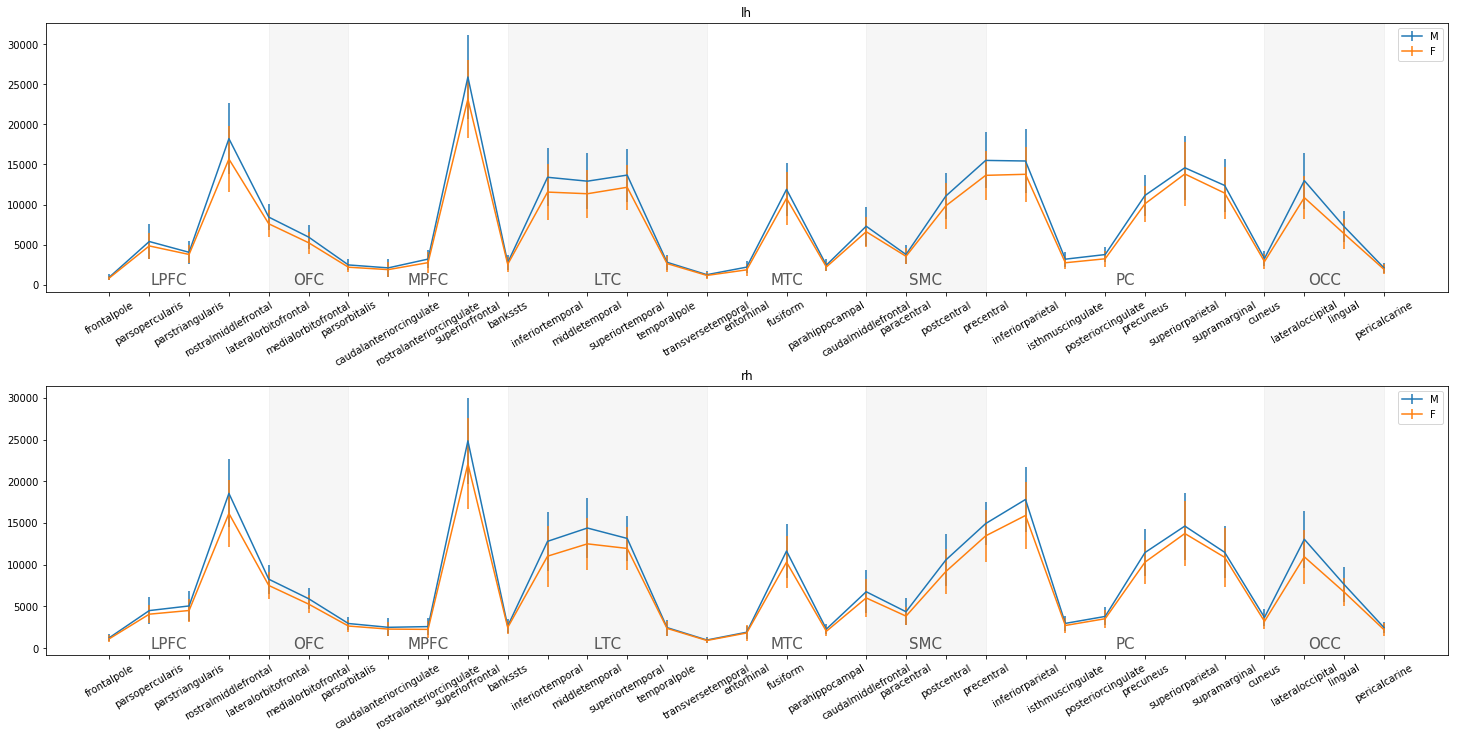

In [96]:
allAge_sex_group = all_thickness_data[['side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject', 'sex']]
allAge_sex_group_mean = allAge_sex_group.groupby(['roi','side','region','sex']).mean().reset_index()
allAge_sex_group_std = allAge_sex_group.groupby(['roi','side','region','sex']).std().reset_index()
allAge_sex_group_std = allAge_sex_group_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'vol_std'})
allAge_sex_group_mean_std = pd.concat([allAge_sex_group_mean, allAge_sex_group_std], axis=1)
output = allAge_sex_group_mean_std.T.drop_duplicates().T

fig, axes = plt.subplots(nrows=2, figsize=(22,12), facecolor='white')



for snum, side in enumerate(['lh', 'rh']):
        
        reorder_df = output.sort_values(['roi','side','sex'])
        gb = reorder_df.groupby('region')
        reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
        reordered_df = reordered_df.reset_index()
        
        roiList = reordered_df.roi.unique()
        
        
        for sexes in (['M', 'F']):
            ax = axes[snum]
            y = reordered_df[reordered_df.sex == sexes]
            y = y[y.side == side]
            ax.errorbar(range(len(roiList)), y.volume, y.vol_std*2, label=sexes)
            ax.set_title(side)
        
        
            ax.set_xticks(range(len(roiList)))
            ax.set_xticklabels(['' for x in roiList])
    
            roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
            roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
            roiOrder_array = np.array(roiOrder_one_list)
            regionToHighlight = roiOrder[1::2]
            xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
            for x in xCoords:
                ax.axvspan(x[0], x[-1], color='lightgray', alpha=0.1)
        
            startNum = 0
            for region in roiOrder:
                x_starting_point = startNum
                startNum = startNum + len(roiDict[region])
                ax.text((x_starting_point-.5 + startNum-.5)/2, 1.2, region, horizontalalignment='center', alpha=.4, fontsize=15)
        
            ax.set_xticklabels(roiList)
            labels = ax.get_xticklabels()
            plt.setp(labels, rotation=30)
            plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)
    
    
            ax.legend()


plt.show()

    
    

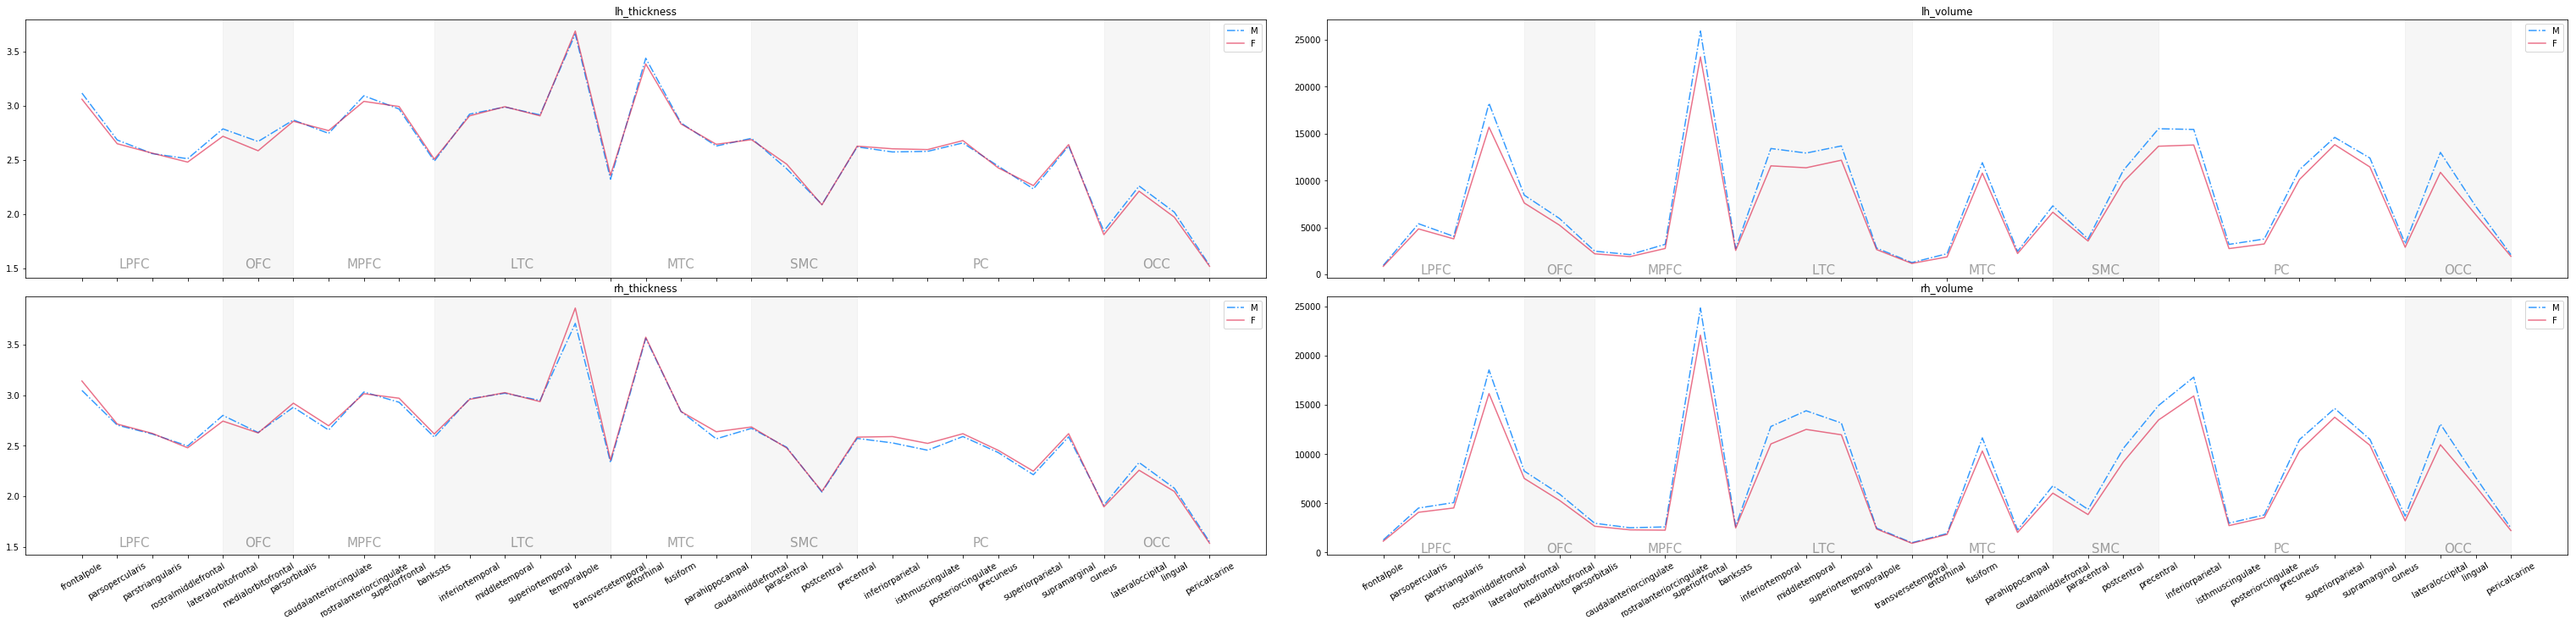

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(44,12), sharex=True, facecolor='white')


alphas = [0.9, 0.6]
line_style = ['dashdot', 'solid']
sexes = ['M', 'F']
colors = ['dodgerblue', 'crimson']


for i, (sex, alpha, line, color) in enumerate(zip(sexes, alphas, line_style, colors)):
    
    
    sex_group_measures = all_thickness_data[all_thickness_data['sex'] == sex]
    sex_group_measures = sex_group_measures[['sex','side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject']]
    sex_group_measures_mean = sex_group_measures.groupby(['roi','side','region']).mean().reset_index()
    sex_group_measures_std = sex_group_measures.groupby(['roi','side','region']).std().reset_index()
    sex_group_measures_std = sex_group_measures_std.rename(columns={'thickness': 'thickness_std', 'thicknessstd': 'thickness_per_region_std', 'volume': 'volume_std'})
    sex_group_measures_mean_std = pd.concat([sex_group_measures_mean, sex_group_measures_std], axis=1)
    output = sex_group_measures_mean_std.T.drop_duplicates().T    
        
    for snum, side in enumerate(['lh', 'rh']):
        
        for ssnum, measure in enumerate(['thickness', 'volume']):
        
            reorder_df = output.sort_values(['roi','side'])
            gb = reorder_df.groupby('region')
            reordered_df = pd.concat([gb.get_group(x) for x in roiOrder])
            reordered_df = reordered_df.reset_index()

            roiList = reordered_df.roi.unique()



            y = reordered_df[reordered_df.side == side]
            y1 = y[[measure]]
            y2 = y[[measure+'_std']]*2
            axes[snum,ssnum].plot(range(len(roiList)), y1, label=sex, alpha=alpha, linestyle=line, color=color)
            #axes[snum,ssnum].errorbar(range(len(roiList)), y1, y2, label=sexes, alpha=alpha, linestyle=line, color=color)
            axes[snum,ssnum].set_title(side+'_'+measure)

            axes[snum,ssnum].set_xticks(range(len(roiList)))
            axes[snum,ssnum].set_xticklabels(['' for x in roiList])

            roiOrder_full = [[x]*len(roiDict[x]) for x in roiOrder]
            roiOrder_one_list = list(itertools.chain.from_iterable(roiOrder_full))
            roiOrder_array = np.array(roiOrder_one_list)
            regionToHighlight = roiOrder[1::2]
            xCoords = [np.where(roiOrder_array==x)[0] for x in regionToHighlight]
            for x in xCoords:
                axes[snum,ssnum].axvspan(x[0], x[-1], alpha=0.1, color='lightgrey')


            startNum = 0
            for region in roiOrder:
                x_starting_point = startNum
                startNum = startNum + len(roiDict[region])
                axes[snum,ssnum].text((x_starting_point-.5 + startNum-.5)/2, 1.5, region, horizontalalignment='center', alpha=.2, fontsize=15)


            axes[snum,ssnum].set_xticklabels(roiList)
            labels = axes[snum,ssnum].get_xticklabels()
            plt.setp(labels, rotation=30)
            plt.tight_layout(pad=7, w_pad=3, h_pad=0.2)


            axes[snum,ssnum].legend()

    
plt.show()
 
    

In [183]:
roiOrder

['LPFC', 'OFC', 'MPFC', 'LTC', 'MTC', 'SMC', 'PC', 'OCC']

In [184]:
roiList

array(['frontalpole', 'parsopercularis', 'parstriangularis',
       'rostralmiddlefrontal', 'lateralorbitofrontal',
       'medialorbitofrontal', 'parsorbitalis', 'caudalanteriorcingulate',
       'rostralanteriorcingulate', 'superiorfrontal', 'bankssts',
       'inferiortemporal', 'middletemporal', 'superiortemporal',
       'temporalpole', 'transversetemporal', 'entorhinal', 'fusiform',
       'parahippocampal', 'caudalmiddlefrontal', 'paracentral',
       'postcentral', 'precentral', 'inferiorparietal', 'isthmuscingulate',
       'posteriorcingulate', 'precuneus', 'superiorparietal',
       'supramarginal', 'cuneus', 'lateraloccipital', 'lingual',
       'pericalcarine'], dtype=object)

In [170]:
roiOrder_full

[['LPFC', 'LPFC', 'LPFC', 'LPFC'],
 ['OFC', 'OFC', 'OFC'],
 ['MPFC', 'MPFC', 'MPFC'],
 ['LTC', 'LTC', 'LTC', 'LTC', 'LTC', 'LTC'],
 ['MTC', 'MTC', 'MTC'],
 ['SMC', 'SMC', 'SMC', 'SMC'],
 ['PC', 'PC', 'PC', 'PC', 'PC', 'PC'],
 ['OCC', 'OCC', 'OCC', 'OCC']]

In [185]:
roiOrder_one_list

['LPFC',
 'LPFC',
 'LPFC',
 'LPFC',
 'OFC',
 'OFC',
 'OFC',
 'MPFC',
 'MPFC',
 'MPFC',
 'LTC',
 'LTC',
 'LTC',
 'LTC',
 'LTC',
 'LTC',
 'MTC',
 'MTC',
 'MTC',
 'SMC',
 'SMC',
 'SMC',
 'SMC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'OCC',
 'OCC',
 'OCC',
 'OCC']

In [172]:
roiOrder_array

array(['LPFC', 'LPFC', 'LPFC', 'LPFC', 'OFC', 'OFC', 'OFC', 'MPFC', 'MPFC',
       'MPFC', 'LTC', 'LTC', 'LTC', 'LTC', 'LTC', 'LTC', 'MTC', 'MTC',
       'MTC', 'SMC', 'SMC', 'SMC', 'SMC', 'PC', 'PC', 'PC', 'PC', 'PC',
       'PC', 'OCC', 'OCC', 'OCC', 'OCC'], 
      dtype='|S4')

In [216]:
for_lobes = all_thickness_data[['sex','side', 'roi', 'region', 'thickness','thicknessstd', 'volume', 'subject']]

In [361]:
sexes = ['M', 'F']
hemis = ['lh', 'rh']

d = []
#tempDf = pd.DataFrame({'Sex': sex, 'Side': hemi, 'Lobe': region, 'Thickness_mean': each_lobe_sex_hemi_mean, 'Thickness_std': each_lobe_sex_hemi_std}, index=[])

for sex in sexes:
    for_lobes_sex = for_lobes[for_lobes['sex'] == sex]
    for_lobes_sex_mean = for_lobes_sex.groupby(['roi','side','region']).mean().reset_index()
    for hemi in hemis:
        for_lobes_sex_mean_hemi = for_lobes_sex_mean[for_lobes_sex_mean['side'] == hemi]
        for regions in roiOrder:
            each_lobe_sex_hemi_mean = for_lobes_sex_mean_hemi.loc[for_lobes_sex_mean_hemi['region'] == regions, 'thickness'].mean()
            each_lobe_sex_hemi_std = for_lobes_sex_mean_hemi.loc[for_lobes_sex_mean_hemi['region'] == regions, 'thickness'].std()
            
            tempDf = pd.DataFrame({'Sex': sex, 'Side': hemi, 'Lobe': region, 'Thickness_mean': each_lobe_sex_hemi_mean, 'Thickness_std': each_lobe_sex_hemi_std}, index=[])

            d = tempDf.append({'Sex': sex, 'Side': hemi, 'Lobe': region, 'Thickness_mean': each_lobe_sex_hemi_mean, 'Thickness_std': each_lobe_sex_hemi_std}, ignore_index=True)

a = pd.concat([d, tempDf])
            

In [362]:
a

,Lobe,Sex,Side,Thickness_mean,Thickness_std
0,OCC,F,rh,1.93405,0.304712
